In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [46]:
# Explore DataFrame of veterans
QBs_DF = pd.read_csv('qb_contract_year_stats_df.csv')
#Flacco DF concat
Flacco_DF = pd.read_csv('flacco_contract_year_stats.csv')
#Concat
QBs_DF = pd.concat([QBs_DF, Flacco_DF]).set_index('Year')

In [47]:
QBs_DF

,Age,Player,Tm,Pos,No.,G,GS,QBrec,Cmp,Att,...,QBR,Sk,Yds.1,NY/A,ANY/A,Sk%,4QC,GWD,AV,Salary
Year,,,,,,,,,,,,,,,,,,,,,
2018,24,Jared Goff,LAR,QB,16,16,16,13-3-0,364,561,...,63.1,33,223,7.52,7.69,5.6,4.0,4.0,18,33500000
2017,32,Matt Ryan,ATL,QB,2,16,16,10-6-0,342,529,...,68.3,24,156,7.12,6.87,4.3,2.0,3.0,15,30000000
2019,42,Tom Brady,NWE,QB,12,16,16,12-4-0,373,613,...,NaN,27,185,6.05,6.24,4.2,1.0,1.0,11,25000000
2018,26,Carson Wentz,PHI,QB,11,11,11,5-6-0,279,401,...,62.6,31,202,6.65,6.89,7.2,2.0,2.0,9,32000000
2019,26,Dak Prescott,DAL,QB,4,16,16,8-8-0,388,596,...,NaN,23,151,7.68,7.84,3.7,NaN,NaN,16,28728536
2019,38,Philip Rivers,LAC,QB,17,16,16,5-11-0,390,591,...,NaN,34,222,7.03,6.32,5.4,1.0,2.0,13,25000000
2017,34,Aaron Rodgers,GNB,qb,12,7,7,4-3-0,154,238,...,64.4,22,168,5.80,5.99,8.5,2.0,2.0,7,33500000
2013,26,Andy Dalton,CIN,QB,14,16,16,11-5-0,363,586,...,55.1,29,182,6.68,6.29,4.7,0.0,3.0,14,16000000
2018,30,Russell Wilson,SEA,QB,3,16,16,10-6-0,280,427,...,62.8,51,355,6.47,7.28,10.7,2.0,4.0,14,35000000


In [48]:
# Need to do cleaning on QBs_DF. 

# Correct naming convention on 'Pos' column
QBs_DF['Pos'] =['QB' for x in range(len(QBs_DF['Pos']))]

QBs_DF.loc[2018,'QBrec']

Year
2018    13-3-0
2018     5-6-0
2018    10-6-0
2018     2-5-0
2018       NaN
Name: QBrec, dtype: object

In [49]:
QBs_DF.isna().sum()

Age       0
Player    0
Tm        0
Pos       0
No.       0
G         0
GS        0
QBrec     1
Cmp       0
Att       0
Cmp%      0
Yds       0
TD        0
TD%       0
Int       0
Int%      0
1D        0
Lng       0
Y/A       0
AY/A      0
Y/C       0
Y/G       0
Rate      0
QBR       8
Sk        0
Yds.1     0
NY/A      0
ANY/A     0
Sk%       0
4QC       4
GWD       4
AV        0
Salary    0
dtype: int64

In [50]:
QBs_DF['4QC'] = QBs_DF['4QC'].fillna(0.0)
QBs_DF['QBrec'] = QBs_DF['QBrec'].fillna('0-0-0')
QBs_DF['GWD'] = QBs_DF['GWD'].fillna(0.0)

In [51]:
def wins_losses(row):
    row['Wins'] = int(row['QBrec'].split('-')[0])
    row['Losses'] = int(row['QBrec'].split('-')[1])
    row['Ties'] = int(row['QBrec'].split('-')[2])
    return row
QBs_DF = QBs_DF.apply(wins_losses, axis = 1)

In [52]:
QBs_DF.corr()['Salary'].sort_values(ascending = False)[1:]

AV        0.546055
Wins      0.525682
Rate      0.497208
TD        0.429240
ANY/A     0.407475
AY/A      0.406449
4QC       0.404726
GWD       0.393488
GS        0.366687
Cmp%      0.356264
TD%       0.338274
Yds       0.317006
G         0.307631
1D        0.287982
Cmp       0.287957
Y/A       0.257468
NY/A      0.249059
Lng       0.246925
Att       0.238180
Y/G       0.231698
Sk        0.206991
Y/C       0.202091
Sk%       0.180788
Yds.1     0.068615
Age       0.062857
No.      -0.017768
QBR      -0.122247
Losses   -0.122285
Int      -0.223161
Int%     -0.400180
Ties           NaN
Name: Salary, dtype: float64

In [53]:
QBs_DF.corr()['Int%'].sort_values(ascending = False)[1:]

Int       0.704302
Y/C       0.595948
Y/G       0.537197
Y/A       0.533867
NY/A      0.521389
Lng       0.467556
No.       0.384547
Losses    0.371152
AY/A      0.303063
Sk%       0.297529
ANY/A     0.280733
TD%       0.226985
Cmp%      0.216172
Yds.1     0.180454
Sk        0.168184
Yds       0.134759
1D        0.130436
Att       0.089036
Age       0.081365
Cmp       0.067834
Rate      0.056679
GS        0.027880
TD       -0.003223
AV       -0.011360
G        -0.024853
GWD      -0.157104
Wins     -0.221368
4QC      -0.238513
Salary   -0.400180
QBR      -0.473815
Ties           NaN
Name: Int%, dtype: float64

In [54]:

QBs_DF.corr()

,Age,No.,G,GS,Cmp,Att,Cmp%,Yds,TD,TD%,...,NY/A,ANY/A,Sk%,4QC,GWD,AV,Salary,Wins,Losses,Ties
Age,1.000000,0.261380,0.016050,0.054467,0.046126,0.022354,0.284397,0.011030,0.040430,0.246237,...,0.193153,0.215647,-0.021299,-0.242211,-0.251180,0.004660,0.062857,-0.029992,0.139171,NaN
No.,0.261380,1.000000,-0.062264,-0.064609,-0.024957,-0.033835,0.188979,0.038762,0.055818,0.240804,...,0.254721,0.190892,0.216977,-0.123352,-0.097844,0.062785,-0.017768,-0.032243,-0.066355,NaN
G,0.016050,-0.062264,1.000000,0.985133,0.935139,0.933412,0.198737,0.944461,0.842340,0.244358,...,0.374038,0.413472,0.205678,0.277474,0.427768,0.888780,0.307631,0.808349,0.550673,NaN
GS,0.054467,-0.064609,0.985133,1.000000,0.962960,0.956310,0.284684,0.963821,0.868987,0.303298,...,0.451706,0.485906,0.221309,0.308687,0.450100,0.902828,0.366687,0.821496,0.557603,NaN
Cmp,0.046126,-0.024957,0.935139,0.962960,1.000000,0.992980,0.276089,0.979274,0.800754,0.181310,...,0.438436,0.439827,0.089852,0.338846,0.444102,0.840341,0.287957,0.755753,0.588359,NaN
Att,0.022354,-0.033835,0.933412,0.956310,0.992980,1.000000,0.186094,0.970122,0.774513,0.128965,...,0.393265,0.380277,0.077120,0.328557,0.436421,0.810881,0.238180,0.753642,0.579772,NaN
Cmp%,0.284397,0.188979,0.198737,0.284684,0.276089,0.186094,1.000000,0.294915,0.408910,0.730208,...,0.819193,0.874809,0.414998,0.119784,0.141109,0.377068,0.356264,0.212616,0.189677,NaN
Yds,0.011030,0.038762,0.944461,0.963821,0.979274,0.970122,0.294915,1.000000,0.836305,0.250520,...,0.517456,0.510717,0.131346,0.295278,0.407936,0.904257,0.317006,0.769008,0.570574,NaN
TD,0.040430,0.055818,0.842340,0.868987,0.800754,0.774513,0.408910,0.836305,1.000000,0.626887,...,0.508773,0.613117,0.314445,0.235176,0.417469,0.899023,0.429240,0.821459,0.327924,NaN
TD%,0.246237,0.240804,0.244358,0.303298,0.181310,0.128965,0.730208,0.250520,0.626887,1.000000,...,0.681181,0.791088,0.643305,0.025240,0.146522,0.450417,0.338274,0.339217,0.038015,NaN


In [55]:
model_variables = ['Wins', 'ANY/A','4QC', 'Int%']
outcome_variable = ['Salary']
train_x = QBs_DF[model_variables] # Variables for use on the model
train_y = QBs_DF[outcome_variable] # Salary. Outcome variable for model. 

In [56]:
train_y

,Salary
Year,
2018,33500000
2017,30000000
2019,25000000
2018,32000000
2019,28728536
2019,25000000
2017,33500000
2013,16000000
2018,35000000


In [57]:
reg_model = linear_model.LinearRegression()

In [58]:
fit_model = reg_model.fit(train_x,train_y)

In [59]:
fit_model.coef_

array([[  398584.71366811,  2484721.20692336,   678359.34808489,
        -4202261.18116119]])

In [60]:
## Load in rookie data set: Can't do during work hours. Clean data Luckily, no store push tomorrow. 
rookie_df = pd.read_csv('rookie_contracts_2019_stats.csv')
rookie_df = rookie_df.apply(wins_losses, axis = 1)
test_x = rookie_df[model_variables]
test_y = rookie_df[outcome_variable]

In [61]:
predict_y = reg_model.predict(test_x)

In [62]:
test_y['Salary'].apply(lambda x: '${:,}'.format(x))
predict_y

array([[11615609.35196289],
       [19575126.92340685],
       [12183840.11530086],
       [22121070.29939843],
       [24767815.8551622 ],
       [34041109.63840206],
       [27323867.27045161],
       [24841136.16534208],
       [16674650.41842917],
       [17984836.81166897],
       [32265051.44584225],
       [14055963.50257628]])

In [63]:
rookie_df['Player']

0        Jameis Winston
1          Kyler Murray
2        Baker Mayfield
3     Mitchell Trubisky
4        Deshaun Watson
5       Patrick Mahomes
6       Gardner Minshew
7            Josh Allen
8          Daniel Jones
9           Sam Darnold
10        Lamar Jackson
11        Mason Rudolph
Name: Player, dtype: object

In [25]:
# Diff between predicted and actual
errors_y = predict_y - test_y
errors_y['Salary'].apply(lambda x: '${:,.2f}'.format(x))

0      $5,277,790.35
1     $10,785,465.92
2      $4,013,095.12
3     $14,862,964.30
4     $21,304,245.86
5     $29,934,662.64
6     $26,646,146.27
7     $19,545,376.17
8     $10,258,636.42
9     $10,422,907.81
10    $29,897,139.45
11    $13,075,491.50
Name: Salary, dtype: object

In [26]:
x_axis = rookie_df['Player']
y_axis = test_y
y_axis_2 = predict_y

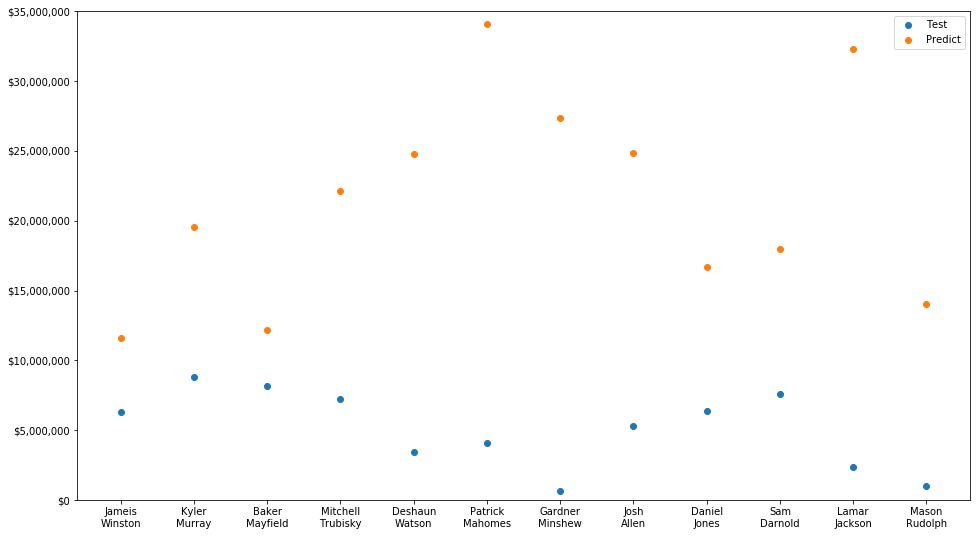

In [44]:
fig, ax = plt.subplots()
fig.set_size_inches(16,9)
ax.scatter(x_axis, y_axis, marker = 'o', label = 'Test')
ax.scatter(x_axis, y_axis_2, label = 'Predict')
ax.legend()
ax.set_ylim(0,35000000)
ax.set_yticklabels(['${:,}'.format(x) for x in range(0,35000001, 5000000)])
ax.set_xticklabels(prac_x_axis, fontsize = 10, ha= 'center', wrap = True)
plt.show()

In [28]:
len(rookie_df['Player'])

12

In [43]:
prac_x_axis = x_axis.apply(lambda x: x.split()[0] + '\n' + x.split()[1])

In [66]:
veterans_predict = fit_model.predict(train_x)
veterans_x_axis = QBs_DF['Player']

In [80]:
train_x

,Wins,ANY/A,4QC,Int%
Year,,,,
2018,13,7.69,4.0,2.1
2017,10,6.87,2.0,2.3
2019,12,6.24,1.0,1.3
2018,5,6.89,2.0,1.7
2019,8,7.84,0.0,1.8
2019,5,6.32,1.0,3.4
2017,4,5.99,2.0,2.5
2013,11,6.29,0.0,3.4
2018,10,7.28,2.0,1.6


In [78]:
len(veterans_predict)

20

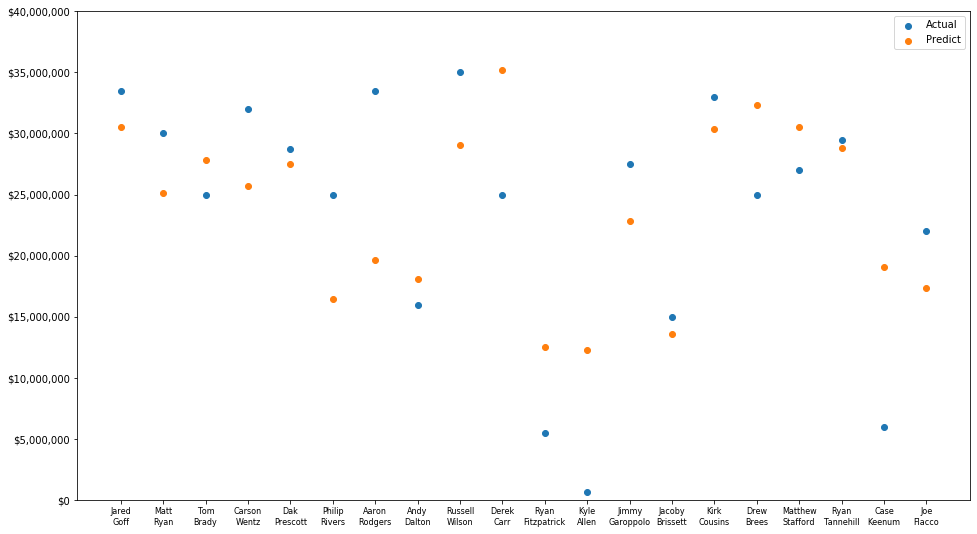

In [86]:
fig, ax = plt.subplots()
fig.set_size_inches(16,9)#
ax.scatter(veterans_x_axis, train_y, marker = 'o', label = 'Actual')
ax.scatter(veterans_x_axis, veterans_predict, label = 'Predict')
ax.legend()
ax.set_ylim(0,40000000)
ax.set_yticklabels(['${:,}'.format(x) for x in range(0,40000001, 5000000)])
ax.set_xticklabels(veterans_x_axis.apply(lambda x: x.split()[0] + '\n' + x.split()[1]), fontsize = 8, ha= 'center', wrap = True)
plt.show()

In [94]:
QBs_DF[QBs_DF['Player'] == 'Aaron Rodgers']

,Age,Player,Tm,Pos,No.,G,GS,QBrec,Cmp,Att,...,NY/A,ANY/A,Sk%,4QC,GWD,AV,Salary,Wins,Losses,Ties
Year,,,,,,,,,,,,,,,,,,,,,
2017,34,Aaron Rodgers,GNB,QB,12,7,7,4-3-0,154,238,...,5.8,5.99,8.5,2.0,2.0,7,33500000,4,3,0


In [95]:
nfl_stats_salary = pd.read_csv('nfl_stats_salary.csv')

In [96]:
nfl_stats_salary

,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,Cmp%,...,Yds.1,NY/A,ANY/A,Sk%,4QC,GWD,Wins,Losses,Ties,Salary
0,Jared Goff,LAR,25.0,QB,16.0,16.0,9-7-0,394.0,626.0,62.9,...,170.0,6.90,6.46,3.4,1.0,2.0,9,7,0,33500000
1,Jameis Winston,TAM,25.0,QB,16.0,16.0,7-9-0,380.0,626.0,60.7,...,282.0,7.17,6.15,7.0,2.0,2.0,7,9,0,6337819
2,Matt Ryan,ATL,34.0,QB,15.0,15.0,7-8-0,408.0,616.0,66.2,...,316.0,6.25,6.08,7.2,3.0,2.0,7,8,0,30000000
3,Tom Brady,NWE,42.0,QB,16.0,16.0,12-4-0,373.0,613.0,60.8,...,185.0,6.05,6.24,4.2,1.0,1.0,12,4,0,23000000
4,Carson Wentz,PHI,27.0,QB,16.0,16.0,9-7-0,388.0,607.0,63.9,...,230.0,5.91,6.26,5.7,2.0,4.0,9,7,0,32000000
5,Dak Prescott,DAL,26.0,QB,16.0,16.0,8-8-0,388.0,596.0,65.1,...,151.0,7.68,7.84,3.7,0.0,0.0,8,8,0,680848
6,Philip Rivers,LAC,38.0,QB,16.0,16.0,5-11-0,390.0,591.0,66.0,...,222.0,7.03,6.32,5.4,1.0,2.0,5,11,0,20812500
7,Aaron Rodgers,GNB,36.0,QB,16.0,16.0,13-3-0,353.0,569.0,62.0,...,284.0,6.15,6.71,6.0,2.0,3.0,13,3,0,33500000
8,Kyler Murray,ARI,22.0,QB,16.0,16.0,5-10-1,349.0,542.0,64.4,...,309.0,5.78,5.55,8.1,1.0,2.0,5,10,1,8789661
9,Baker Mayfield,CLE,24.0,QB,16.0,16.0,6-10-0,317.0,534.0,59.4,...,285.0,6.17,5.29,7.0,1.0,1.0,6,10,0,8170745
